In [1]:
import os
from utils import DATA_DIR, CHART_DIR
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

# 이후에 같은 데이터를 생성하기 위해
sp.random.seed(3)  

data = sp.genfromtxt(os.path.join(DATA_DIR, "web_traffic.tsv"), delimiter="\t")
# param1: fname : file or str
#     File, filename, or generator to read. If the filename extension is gz or bz2, the file is first decompressed. Note that generators must return byte strings in Python 3k.
# param2 : delimiter : str, int, or sequence, optional
#     The string used to separate values. By default, any consecutive whitespaces act as delimiter. An integer or sequence of integers can also be provided as width(s) of each field.
print(data[:10])
print(data.shape)

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]
(743, 2)


In [2]:
# 예제는 3갸지 범주이다
colors = ['g', 'k', 'b', 'm', 'r']
linestyles = ['-', '-.', '--', ':', '-']

x = data[:, 0]
y = data[:, 1]
print("Number of invalid entries:", sp.sum(sp.isnan(y)))

# nan 제거과정
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

('Number of invalid entries:', 8)


In [3]:
# 입력 데이터 그리기
def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):

    plt.figure(num=None, figsize=(8, 6))
    # param1: num ???
    # param2: figsize w,h tuple in inches
    
    plt.clf()
    # Clear the current figure.
    
    plt.scatter(x, y, s=10)
    # 
    
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    
    # 시간 단위 data를 w-axis plot에 적당하게 조작
    plt.xticks(
        [w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])

    if models:
        if mx is None:
            mx = sp.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
    
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    
    plt.grid(True, linestyle='-', color='0.75')
    
    plt.savefig(fname)

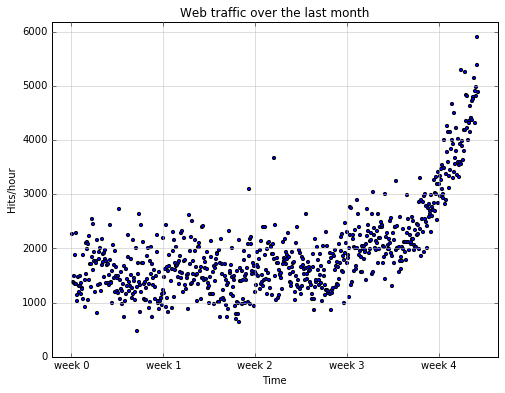

In [4]:
# 데이터 얼핏 보기
plot_models(x, y, None, os.path.join(CHART_DIR, "1400_01_01.png"))

In [5]:
# 모델 생성과 그리기
fp1, res1, rank1, sv1, rcond1 = sp.polyfit(x, y, 1, full=True)
print("Model parameters of fp1: %s" % fp1)
print("Error of the model of fp1:", res1)
f1 = sp.poly1d(fp1)

fp2, res2, rank2, sv2, rcond2 = sp.polyfit(x, y, 2, full=True)
print("Model parameters of fp2: %s" % fp2)
print("Error of the model of fp2:", res2)
f2 = sp.poly1d(fp2)


Model parameters of fp1: [   2.59619213  989.02487106]
('Error of the model of fp1:', array([  3.17389767e+08]))
Model parameters of fp2: [  1.05322215e-02  -5.26545650e+00   1.97476082e+03]
('Error of the model of fp2:', array([  1.79983508e+08]))


In [6]:
f3 = sp.poly1d(sp.polyfit(x, y, 3))
f10 = sp.poly1d(sp.polyfit(x, y, 10))


In [7]:
f100 = sp.poly1d(sp.polyfit(x, y, 100))



/Users/jhyun/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:586: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/Users/jhyun/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


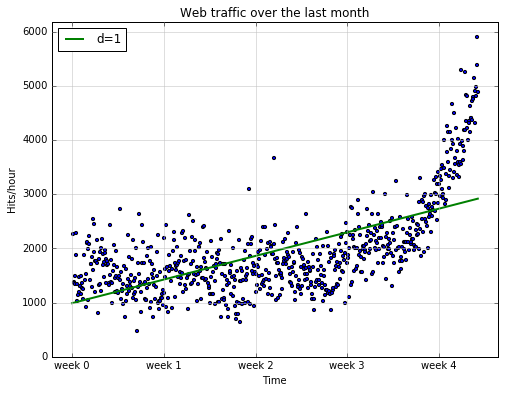

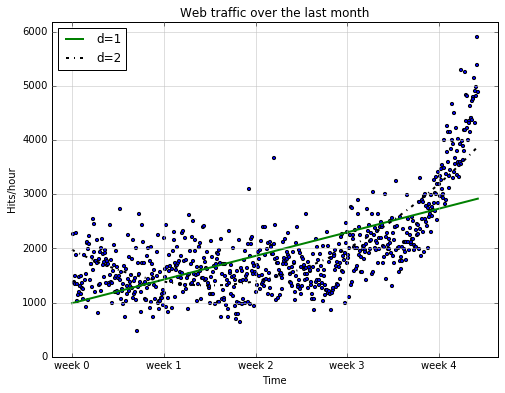

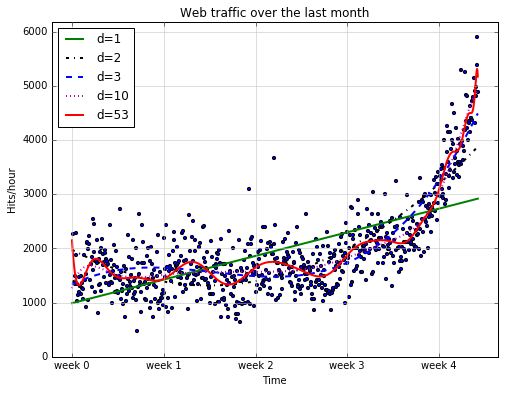

In [8]:
plot_models(x, y, [f1], os.path.join(CHART_DIR, "1400_01_02.png"))
plot_models(x, y, [f1, f2], os.path.join(CHART_DIR, "1400_01_03.png"))
plot_models(
    x, y, [f1, f2, f3, f10, f100], os.path.join(CHART_DIR, "1400_01_04.png"))

/Users/jhyun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/jhyun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/jhyun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/jhyun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


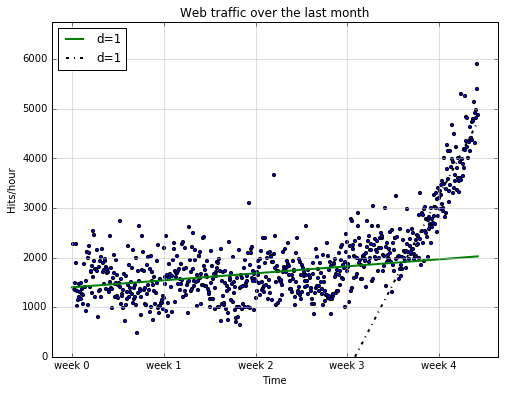

In [9]:
# 변곡점에 대한 정보를 사용하여 모델 생성과 그리기
inflection = 3.5 * 7 * 24
xa = x[:inflection]
ya = y[:inflection]
xb = x[inflection:]
yb = y[inflection:]

fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

plot_models(x, y, [fa, fb], os.path.join(CHART_DIR, "1400_01_05.png"))

In [10]:
def error(f, x, y):
    return sp.sum((f(x) - y) ** 2)

print("Errors for the complete data set:")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, x, y)))

print("Errors for only the time after inflection point")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

print("Error inflection=%f" % (error(fa, xa, ya) + error(fb, xb, yb)))

Errors for the complete data set:
Error d=1: 317389767.339778
Error d=2: 179983507.878179
Error d=3: 139350144.031725
Error d=10: 121942326.363703
Error d=53: 109452387.584333
Errors for only the time after inflection point
Error d=1: 145045835.134473
Error d=2: 61116348.809620
Error d=3: 33214248.905598
Error d=10: 21611594.265041
Error d=53: 18656084.561736
Error inflection=132950348.197616


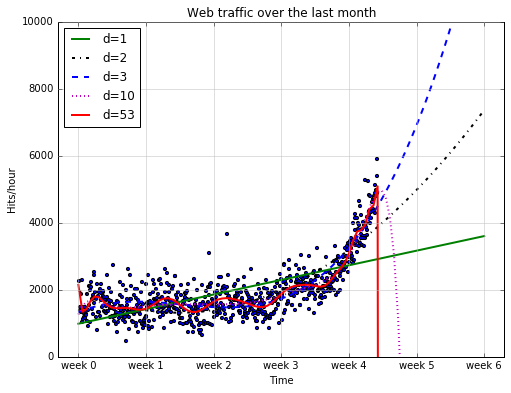

In [11]:
# 미래 추정하기
plot_models(
    x, y, [f1, f2, f3, f10, f100],
    os.path.join(CHART_DIR, "1400_01_06.png"),
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

In [12]:
print("Trained only on data after inflection point")
fb1 = fb
fb2 = sp.poly1d(sp.polyfit(xb, yb, 2))
fb3 = sp.poly1d(sp.polyfit(xb, yb, 3))
fb10 = sp.poly1d(sp.polyfit(xb, yb, 10))
fb100 = sp.poly1d(sp.polyfit(xb, yb, 100))
print("Errors for only the time after inflection point")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

Trained only on data after inflection point
Errors for only the time after inflection point
Error d=1: 22143941.107618
Error d=2: 19768846.989176
Error d=3: 19766452.361027
Error d=10: 18949296.674467
Error d=53: 18300710.035824


/Users/jhyun/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/jhyun/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


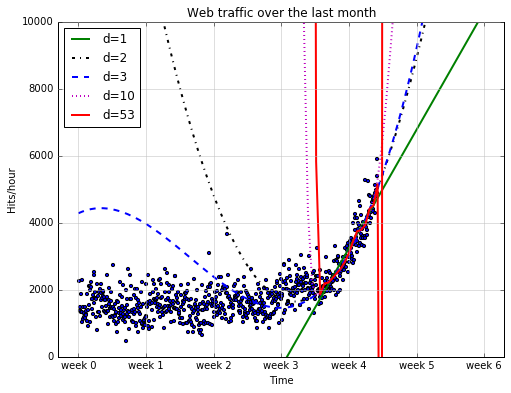

In [13]:
plot_models(
    x, y, [fb1, fb2, fb3, fb10, fb100],
    os.path.join(CHART_DIR, "1400_01_07.png"),
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

In [14]:
# 테스트 데이터와 훈련 데이터 분리
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s"%fbt2)
print("fbt2(x)-100,000= \n%s"%(fbt2-100000))
fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
fbt100 = sp.poly1d(sp.polyfit(xb[train], yb[train], 100))

fbt2(x)= 
       2
0.086 x - 94.02 x + 2.744e+04
fbt2(x)-100,000= 
       2
0.086 x - 94.02 x - 7.256e+04


/Users/jhyun/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/jhyun/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


In [15]:
print("Test errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

Test errors for only the time after inflection point
Error d=1: 6397694.386394
Error d=2: 6010775.401243
Error d=3: 6047678.658525
Error d=10: 7037910.453846
Error d=53: 7052526.987135


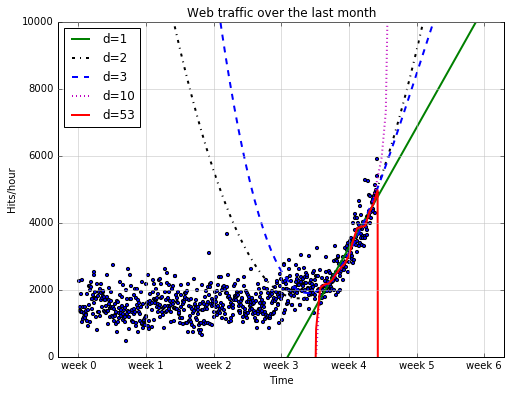

In [16]:
plot_models(
    x, y, [fbt1, fbt2, fbt3, fbt10, fbt100],
    os.path.join(CHART_DIR, "1400_01_08.png"),
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

In [17]:
from scipy.optimize import fsolve
print(fbt2)
print(fbt2 - 100000)
reached_max = fsolve(fbt2 - 100000, x0=800) / (7 * 24)
print("100,000 hits/hour expected at week %f" % reached_max[0])

       2
0.086 x - 94.02 x + 2.744e+04
       2
0.086 x - 94.02 x - 7.256e+04
100,000 hits/hour expected at week 9.616071
